# Brandon Inscoe
## PHY-2200
## Unit 02 project

In 1975, Benoit Mandelbrot coined the term "fractals" to describe the behavior in the stock market. Mandelbrot noticed that the behavior of the stock market had the same characteristics and same chaotic activity no matter what scale it was on, be it yearly, monthly, daily and even hourly. Fractals are also found in human pursuits such as music, painting and architecture. Mandelbrot believed that fractals, far from being unnatural, were in many ways more intuitive and natural than the artificially smooth objects of traditional Euclidean geometry.

Mandelbrot is quoted for saying "Clouds are not spheres, mountains are not cones, coastlines are not circles, and bark is not smooth, nor does lightning travel in a straight line."

In this project, I will explore and visualize Mandelbrot fractals. Fractals, a conjuncture of "fractional dimensions", is a detailed, recursive and infinitely self-similar mathematical set.  Fractals exhibit similar patterns at increasingly small scales, meaning that if you zoom in on the fractal, you will see a pattern very similar to what you saw before. There are many natural phenomena that exhibit fractal qualities. Natural phenomena such as mountains, coast lines, lightning bolts, trees and ice crystals.

In this project, we will look in particular at the Mandelbrot fractals. The Mandelbrot set is the set of complex numbers $\displaystyle c$ for which the function $$\displaystyle f_{c}(z)=z^{2}+c$$ 

does not diverge when iterated from $\displaystyle z=0$, i.e., for which the sequence

$$\displaystyle f_{c}(0), \displaystyle f_{c}(f_{c}(0))$$

etc., remains bounded in absolute value.

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import numba

First we want to create a function to define the function to do the calculations of the Mandelbrot fractal.

The @numba.jit$^1$ is used to increase the speed of the funtion

The **break**$^1$ statement terminates the loop when this condition is met. The number of iterations are counted until the function diverges or returns the iteration threshold.
   

In [219]:
@numba.jit  
def mandelbrot(a,total_iters):  #total_iters = toatal iterations
    b=a
    
    for m in range(total_iters):
        b=b*b+a
        if (b.real*b.real + b.imag*b.imag >=4.0):break # 
    return m

Now we want to create a funtion that will create the image of the Mandelbrot fractals and make it general so that we can zoom in to various areas without having to write the block of code over and over. We can just change the dimensions and pass those to the function. In this function, we will employ the **plt.imshow**$^3$ function to help give the Mandelbrot fractal color.

In [220]:
#define the function to create the image of the fractal
def makefractal(xl,xr,yb,yt,box_dimens=None):
    
    #create a box with these pixel dimensions
    nx = 600
    ny = 481
    total_iters = 1000

    x = np.linspace(xl, xr, nx)
    y = np.linspace(yb, yt, ny)

    fractal = np.zeros((ny, nx, 3))   #creates the fractal RGB image

    #this loop creates the mendelbrot fractal
    for i in range(nx):
        for k in range(ny):
            m = mendelbrot(x[i] + 1j*y[k],total_iters)       #point in complex plane
            fractal[k, i] = [1*m, 3*m, 5*m]                  #RGB color mix
    plt.imshow(fractal/total_iters, extent=[xl,xr,yb,yt])    #plot image
    if box_dimens:
        plt.plot([box_dimens[0],box_dimens[1]],[box_dimens[3],box_dimens[3]], color="white")
        plt.plot([box_dimens[0],box_dimens[1]],[box_dimens[2],box_dimens[2]], color="white")
        plt.plot([box_dimens[0],box_dimens[0]],[box_dimens[2],box_dimens[3]], color="white")
        plt.plot([box_dimens[1],box_dimens[1]],[box_dimens[2],box_dimens[3]], color="white")
    plt.show()

Now we will call the function with the chosen dimensions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


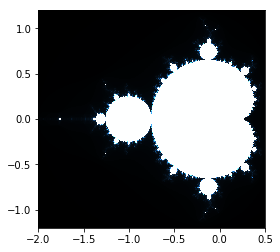

In [221]:
makefractal(-2.0, 0.5, -1.2, 1.2)

We made our first fractal!!

Now we want to zoom in on a section of the fractal and see what it looks like. Each subsequent
area will be designated by a box. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


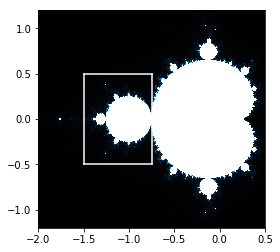

In [222]:
makefractal(-2.0, 0.5, -1.2, 1.2, box_dimens=(-1.5, -0.75, -0.5, 0.5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


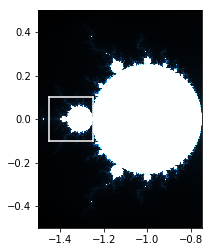

In [223]:
makefractal(-1.5, -0.75, -0.5, 0.5, box_dimens=(-1.45, -1.25, -0.1, 0.1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


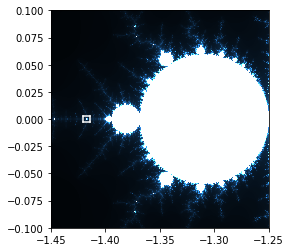

In [224]:
makefractal(-1.45, -1.25, -0.1, 0.1, box_dimens=(-1.421, -1.414, -0.003, 0.003))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


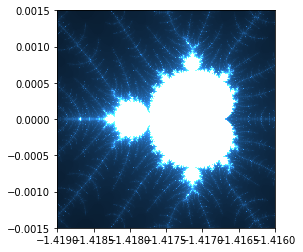

In [225]:
makefractal(-1.419, -1.416, -0.0015, 0.0015)

This zoomed in area looks exactly loke the image that we started with. Each subsequent zoom looks almost identical to the previous picture.

As you can see, fractals are fascinating! The Mandelbrot set has become popular outside mathematics both for its aesthetic appeal and as an example of a complex structure arising from the application of simple rules. It is one of the best-known examples of mathematical visualization and mathematical beauty.

## Bibliography

   1) *Computational Modeling* Wang, Jay; 2016
   
   2) www.programiz.com/python-programming/break-continue 
   
   3) www.matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html